###   DATA SCIENCE ASSIGNMENT 2

## **Choosing a Dataset**

**Introduction**

Breast cancer is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

**Use of classification of tumor as malignant or benign**

Accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of breast cancer and classification of patients into malignant or benign groups is the subject of extensive research.

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Dataset features**

*   Number of instances: 569 
*   Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

*   Attribute information

1) ID number<br>
2) Diagnosis (M = malignant, B = benign)<br>
3-32)
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

*   All feature values are recoded with four significant digits.
*   Missing attribute values: None.
*   Class distribution: 357 benign, 212 malignant.

In [ ]:
! gdown --id 1qGJKO9a8P9PACJB0Qs21errnOqYFOniL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qGJKO9a8P9PACJB0Qs21errnOqYFOniL
To: /content/wdbc.csv
100% 125k/125k [00:00<00:00, 59.6MB/s]


In [ ]:
#importing the dataset 
dataset = pd.read_csv('/content/wdbc.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values
dataset.columns=(["ID","radius_1","texture_1","perimeter_1","area_1","smoothness_1","compactness_1","concavity_1","concave_points_1","symmetry_1","fractal_dimension_1","radius_2","texture_2","perimeter_2","area_2","smoothness_2","compactness_2","concavity_2","concave_points_2","symmetry_2","fractal_dimension_2","radius_3","texture_3","perimeter_3","area_3","smoothness_3","compactness_3","concavity_3","concave_points_3","symmetry_3","fractal_dimension_3","diagnosis"])
dataset.head()

,ID,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave_points_1,symmetry_1,...,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3,diagnosis
0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
2,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
3,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
4,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M


In [ ]:
dataset.head()

print("Cancer data set dimensions : {}".format(dataset.shape))

dataset.groupby('diagnosis').size()

Cancer data set dimensions : (568, 32)


diagnosis
B    357
M    211
dtype: int64

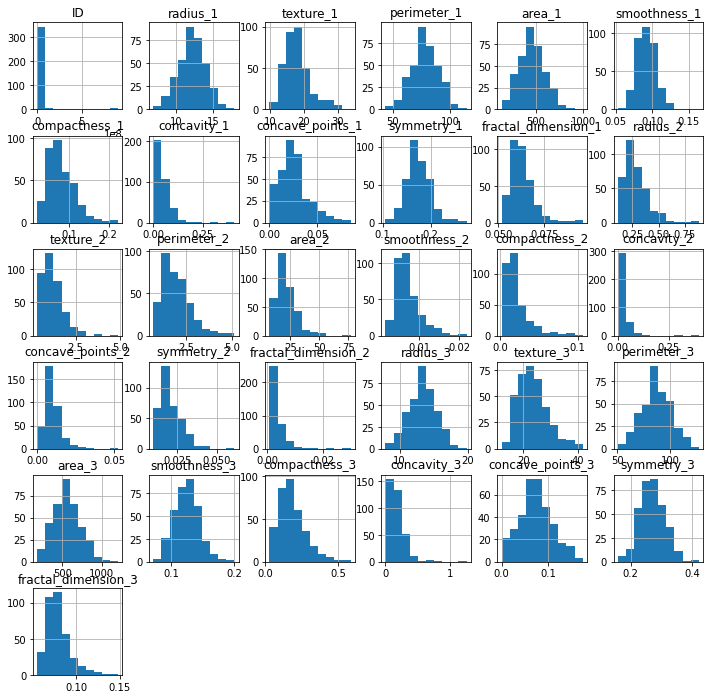

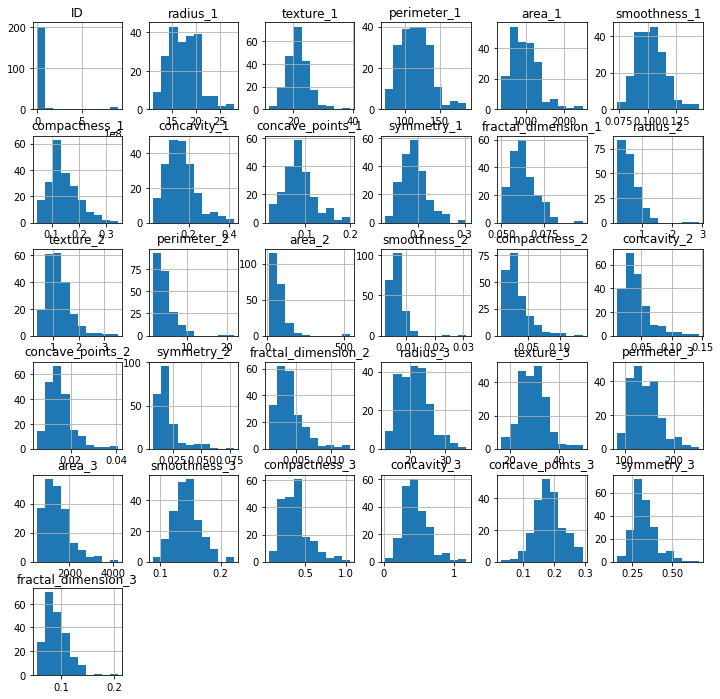

In [ ]:
#Visualization of data
dataset.groupby('diagnosis').hist(figsize=(12, 12))

dataframe = pd.DataFrame(Y)

In [ ]:
dataset.isnull().sum()
dataset.isna().sum()


ID                     0
radius_1               0
texture_1              0
perimeter_1            0
area_1                 0
smoothness_1           0
compactness_1          0
concavity_1            0
concave_points_1       0
symmetry_1             0
fractal_dimension_1    0
radius_2               0
texture_2              0
perimeter_2            0
area_2                 0
smoothness_2           0
compactness_2          0
concavity_2            0
concave_points_2       0
symmetry_2             0
fractal_dimension_2    0
radius_3               0
texture_3              0
perimeter_3            0
area_3                 0
smoothness_3           0
compactness_3          0
concavity_3            0
concave_points_3       0
symmetry_3             0
fractal_dimension_3    0
diagnosis              0
dtype: int64

Hence there are no missing or null values.

In [ ]:
dataset.describe()

,ID,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave_points_1,symmetry_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Possible methods to classify tumors as malignant and benign :**


*   Decision Tree : A supervised learning algorithm used to make a decision based on probability and previous decisions.
*   Logistic Regression : A supervised learning algorithm used when the dependent variable is categorical. It predicts the class of individuals based on one or more predictor variables.



---



In [ ]:
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import seaborn as sns
sns.set()
sns.set_style("ticks", {
    'axes.grid': True,
    'grid.color': '.9',
    'grid.linestyle': u'-',
    'figure.facecolor': 'white', # axes
})
sns.set_context("notebook")

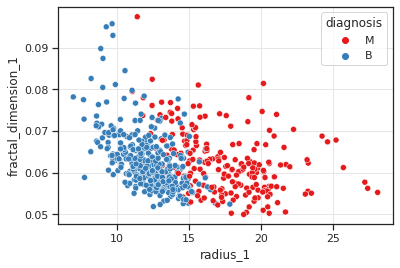

In [ ]:
sns.scatterplot(x=dataset.radius_1, y=dataset.fractal_dimension_1, hue=dataset.diagnosis, palette='Set1')

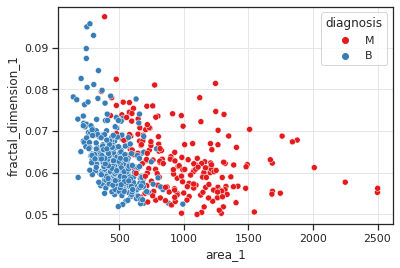

In [ ]:
sns.scatterplot(x=dataset.area_1, y=dataset.fractal_dimension_1, hue=dataset.diagnosis, palette='Set1')

## **Choosing a model**

Classification is an effective way to classify data especially in the medical field, where those methods are widely used in diagnosis and analysis to make decisions.<br>
The algorithm chosen for this datset is K-nearest neighbors (KNN) algorithm.<br>
K Nearest Neighbor(KNN) algorithm is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most common among its k nearest neighbours (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbour.

In KNN, K is the number of nearest neighbours. The number of neighbours is the core deciding factor. K is generally an odd number if the number of classes is 2.<br>
Advantages:
It is extremely easy to implement.<br>
As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.<br>
Since the algorithm requires no training before making predictions, new data can be added seamlessly.<br>
There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.).<br>


In [ ]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
#95.1 Acuracy

KNeighborsClassifier()

In [ ]:
classifier.score(X_train, Y_train)

0.971830985915493

In [ ]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
#print(Y_pred)
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
#c = print(cm[0, 0] + cm[1, 1])
cm

array([[92,  0],
       [ 6, 44]])

In [ ]:
classifier.score(X_test, Y_test)

0.9577464788732394

Hence, accuracy of the train dataset is more than the test dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


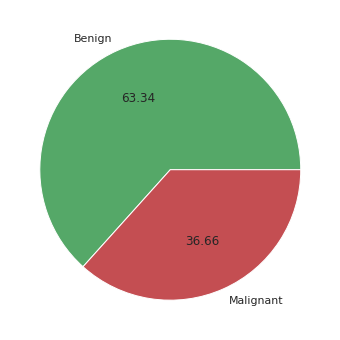

In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import numpy as np
plt.pie(np.c_[np.sum(np.where(Y_train==0)),np.sum(np.where(Y_train==1))],
        labels=['Benign','Malignant'],
        colors=['g','r'],
        shadow=False,
        autopct ='%.2f' )
plt.gcf().set_size_inches((6,6))
plt.savefig("pie.png",dpi=300, bbox_inches='tight')

#Other parameters

##Using radius:

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X[:,:2], Y, test_size = 0.25, random_state = 0)

In [ ]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X1_train, Y1_train)

KNeighborsClassifier()

In [ ]:
classifier.score(X1_train, Y1_train)

0.9107981220657277

In [ ]:
#predicting the Test set results
Y1_pred = classifier.predict(X1_test)
#print(Y_pred)
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y1_test, Y1_pred)
#c = print(cm[0, 0] + cm[1, 1])
cm

array([[85,  7],
       [ 9, 41]])

In [ ]:
classifier.score(X1_test, Y1_test)

0.8873239436619719

##Using fractal dimension

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X[:,:-1], Y, test_size = 0.25, random_state = 0)

In [ ]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X2_train, Y2_train)

KNeighborsClassifier()

In [ ]:
classifier.score(X2_train, Y2_train)

0.9507042253521126

In [ ]:
#predicting the Test set results
Y2_pred = classifier.predict(X2_test)
#print(Y_pred)
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2_test, Y2_pred)
#c = print(cm[0, 0] + cm[1, 1])
cm

array([[88,  4],
       [ 7, 43]])

In [ ]:
classifier.score(X2_test, Y2_test)

0.9225352112676056

Hence, the fractal dimension proves to be comparatively more accurate and more closer to the result obtained while taking the whole, than any other parameter.